In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)  

In [3]:
# Filter for Jobs in Germany
df_GE = df[df['job_country'] == 'Germany'].copy()

In [4]:
#Explode Method to get each skill of skills list in a single row
df_skills = df_GE.explode('job_skills')


In [5]:
#Group by Job Titles and Job Skills
df_skills_count = df_skills.groupby(['job_title_short', 'job_skills']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count') #Transfert a serie to df

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [6]:
# Filter for Top 3 Jobs: Data Analyst, Data Engineer, Data Scientist

top_3 = df_GE['job_title_short'].value_counts().head(3).index

top_3

Index(['Data Analyst', 'Data Scientist', 'Data Engineer'], dtype='object', name='job_title_short')

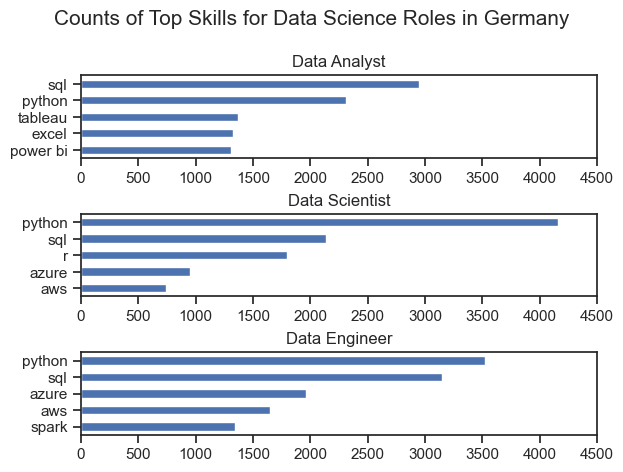

In [14]:
fig, ax = plt.subplots(len(top_3), 1)

#Display Plots for the top 3 Job Titles
for i, job_title in enumerate(top_3):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5) #Top 5 Skills
    df_plot.plot(kind='barh', ax=ax[i], x='job_skills', y='skill_count', title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 4500)

fig.suptitle('Counts of Top Skills for Data Science Roles in Germany', fontsize=15)
fig.tight_layout(h_pad=0.5)  #Fix the overlap
plt.show()

In [15]:
# Use original df to get the count of job titles
df_job_title_count = df_GE['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,7131
1,Data Scientist,6745
2,Data Engineer,6675
3,Senior Data Engineer,2041
4,Senior Data Scientist,1737
5,Senior Data Analyst,1216
6,Business Analyst,817
7,Software Engineer,741
8,Machine Learning Engineer,402
9,Cloud Engineer,189


In [11]:
#Merge df_skills_count and df_job_title_count and Calculate percentages
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how= 'left', on= 'job_title_short')
df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100
df_skills_perc


,job_title_short,job_skills,skill_count,jobs_total,skill_percent
0,Data Scientist,python,4157,6745,61.630838
1,Data Engineer,python,3524,6675,52.794007
2,Data Engineer,sql,3145,6675,47.116105
3,Data Analyst,sql,2947,7131,41.326602
4,Data Analyst,python,2309,7131,32.379750
...,...,...,...,...,...
1377,Data Engineer,airtable,1,6675,0.014981
1378,Senior Data Scientist,vb.net,1,1737,0.057571
1379,Senior Data Scientist,visual basic,1,1737,0.057571
1380,Senior Data Analyst,powerbi,1,1216,0.082237


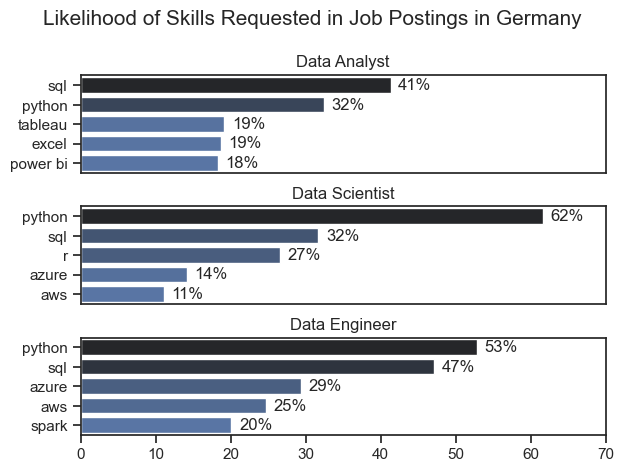

In [17]:
#Plot Percentage Count 
fig, ax = plt.subplots(len(top_3), 1)

sns.set_theme(style='ticks')
#Display Plots for the top 3 Job Titles
for i, job_title in enumerate(top_3):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5) #Top 5 Skills
    sns.barplot(data=df_plot, x='skill_percent',y= 'job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 70)
    # remove the x-axis tick labels for better readability
    if i != len(top_3) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')
   
fig.suptitle('Likelihood of Skills Requested in Job Postings in Germany', fontsize=15)
fig.tight_layout(h_pad=0.8)  #Fix the overlap
plt.show()